# Clustering K-Means Unsupervised Learning Task

It groups unlabeled data points into a predefined number of clusters (k) based on similarity. 

The algorithm works iteratively by randomly assigning initial data points as cluster centroids, then assigning each data point to the closest centroid. It then recalculates the centroids based on the assigned data points and repeats the process until the clusters no longer change, aiming to minimize the sum of squared distances between data points and their assigned centroids.

## How K-Means Clustering works :

1. Choose 'k': A user selects the desired number of clusters (k) for the dataset. 
2. Random Centroid Initialization: k initial centroids are randomly selected from the data points. 
3. Assignment Step: Each data point is assigned to the cluster whose centroid is nearest, using a distance metric (like Euclidean distance). 
4. Update Step: The mean (or centroid) of each cluster is recalculated based on the data points now assigned to it. 
5. Iteration: Steps 3 and 4 are repeated until the cluster assignments no longer change, indicating convergence. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("K-MEANS ALGORITHM: STEP-BY-STEP VISUALIZATION")
print("=" * 50)

K-MEANS ALGORITHM: STEP-BY-STEP VISUALIZATION


Created dataset: 150 points, 2 features
True number of clusters: 3


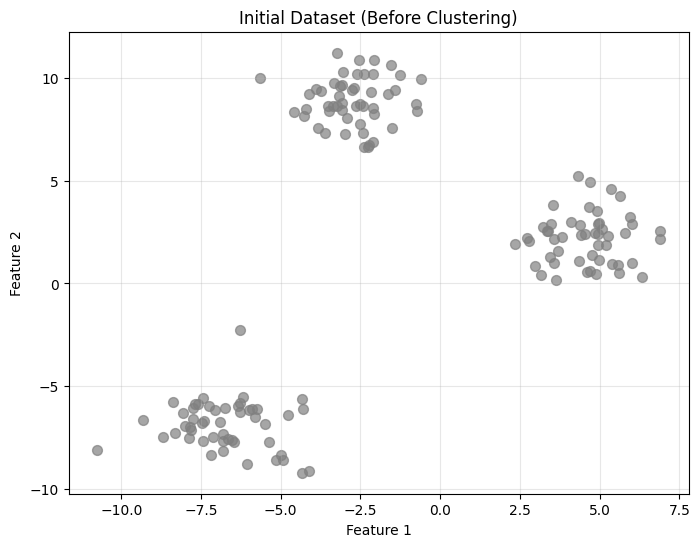

In [8]:
# Preparing Data and Setup

# Create simple dataset for clear visualization
X, y_true = make_blobs(n_samples=150, centers=3, n_features=2, 
                       cluster_std=1.2, random_state=42)

print(f"Created dataset: {X.shape[0]} points, {X.shape[1]} features")
print(f"True number of clusters: 3")

# Visualize initial data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.7)
plt.title('Initial Dataset (Before Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Manual Step-by-Step K-Means Implementation

def plot_kmeans_step(X, centroids, labels, step_num, title_suffix=""):
    """Helper function to visualize each step"""
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    plt.figure(figsize=(10, 6))
    
    # Plot points colored by cluster assignment
    for i in range(len(centroids)):
        mask = labels == i
        if np.any(mask):
            plt.scatter(X[mask, 0], X[mask, 1], 
                       c=colors[i], s=50, alpha=0.7, 
                       label=f'Cluster {i}')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='black', marker='X', s=200, linewidths=2,
               edgecolors='white', label='Centroids')
    
    plt.title(f'Step {step_num}: {title_suffix}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def euclidean_distance(point, centroid):
    """Calculate Euclidean distance between point and centroid"""
    return np.sqrt(np.sum((point - centroid) ** 2))

def assign_clusters(X, centroids):
    """Assign each point to nearest centroid"""
    n_points = X.shape[0]
    n_clusters = centroids.shape[0]
    
    labels = np.zeros(n_points)
    distances = np.zeros((n_points, n_clusters))
    
    # Calculate distance from each point to each centroid
    for i, point in enumerate(X):
        for j, centroid in enumerate(centroids):
            distances[i, j] = euclidean_distance(point, centroid)
        
        # Assign to nearest centroid
        labels[i] = np.argmin(distances[i])
    
    return labels.astype(int), distances

def update_centroids(X, labels, k):
    """Update centroids to mean of assigned points"""
    centroids = np.zeros((k, X.shape[1]))
    
    for i in range(k):
        mask = labels == i
        if np.any(mask):  # If cluster has points
            centroids[i] = np.mean(X[mask], axis=0)
        else:  # If cluster is empty, keep old centroid
            centroids[i] = centroids[i]
    
    return centroids

Initial centroids:
  Centroid 0: (-10.63, 9.23)
  Centroid 1: (0.06, 5.68)
  Centroid 2: (-11.36, 11.56)


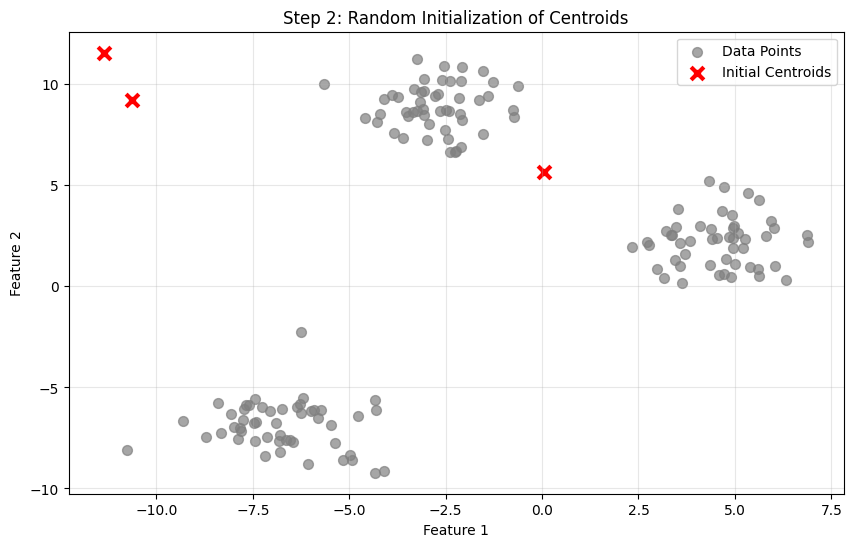

In [11]:
# Initialisation

k = 3  # Number of clusters
max_iterations = 10

# Random initialization of centroids
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

centroids = np.array([
    [np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)] for _ in range(k)
])

print(f"Initial centroids:")
for i, centroid in enumerate(centroids):
    print(f"  Centroid {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

# Initial assignment (all points unassigned)
initial_labels = np.full(X.shape[0], -1)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='red', marker='X', s=200, linewidths=2,
           edgecolors='white', label='Initial Centroids')
plt.title('Step 2: Random Initialization of Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Starting K-Means iterations (max 10 iterations):
-------------------------------------------------------

ITERATION 1:
3a. Assigning points to nearest centroids...


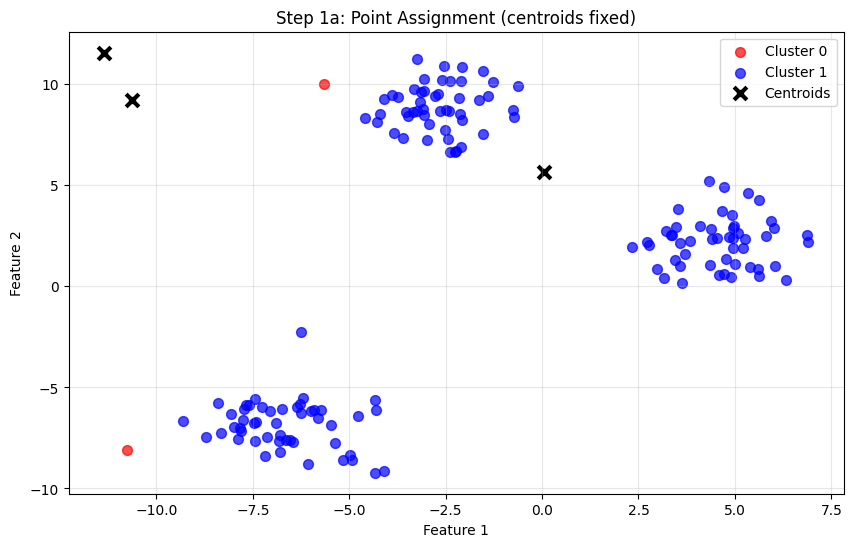

    Points per cluster: [  2 148]
    Current WCSS (inertia): 13116.82
3b. Updating centroids to cluster means...


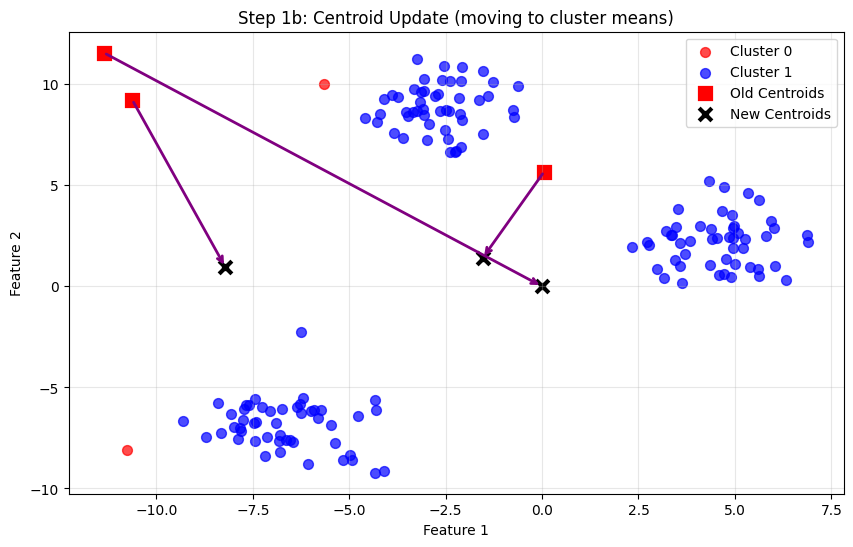

    New centroids:
      Centroid 0: (-8.21, 0.95) [moved 8.631]
      Centroid 1: (-1.54, 1.39) [moved 4.574]
      Centroid 2: (0.00, 0.00) [moved 16.211]
    Total centroid movement: 29.416
    → Continuing... (movement >= 0.01)

ITERATION 2:
3a. Assigning points to nearest centroids...


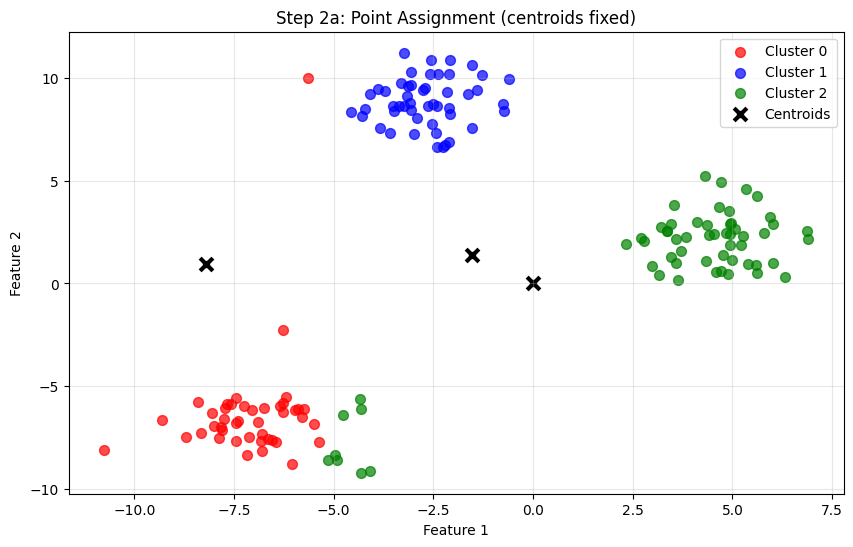

    Points per cluster: [43 49 58]
    Current WCSS (inertia): 7684.32
3b. Updating centroids to cluster means...


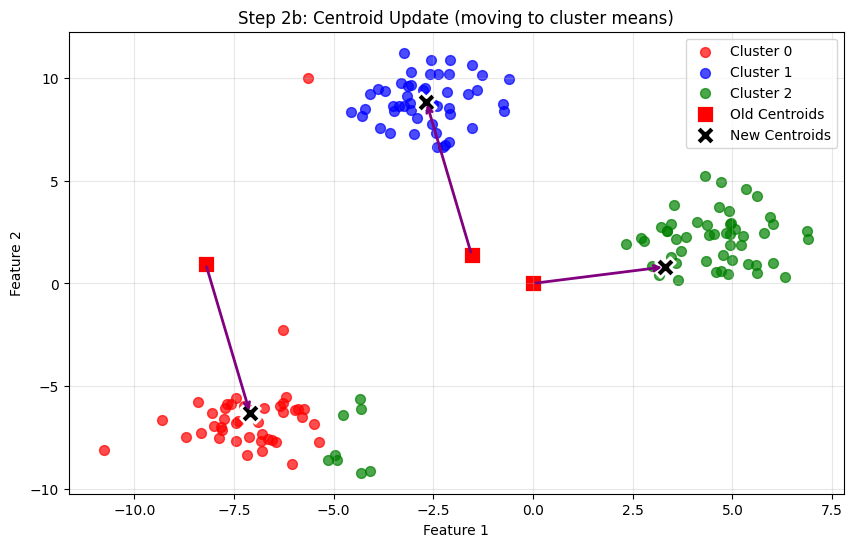

    New centroids:
      Centroid 0: (-7.10, -6.34) [moved 7.367]
      Centroid 1: (-2.68, 8.86) [moved 7.549]
      Centroid 2: (3.31, 0.81) [moved 3.403]
    Total centroid movement: 18.320
    → Continuing... (movement >= 0.01)

ITERATION 3:
3a. Assigning points to nearest centroids...


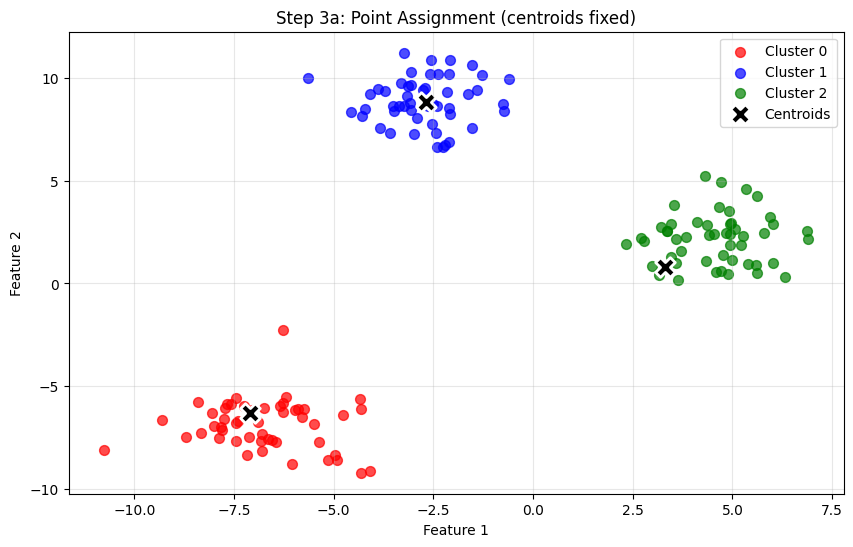

    Points per cluster: [50 50 50]
    Current WCSS (inertia): 604.85
3b. Updating centroids to cluster means...


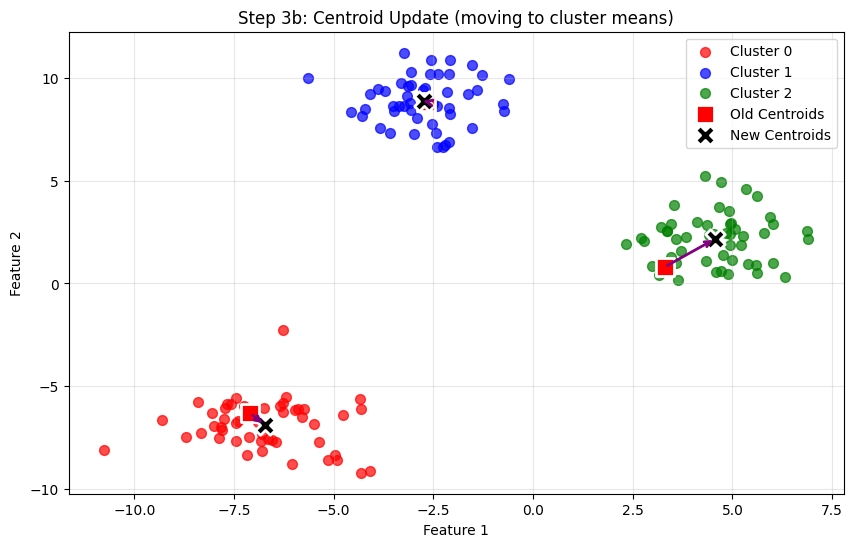

    New centroids:
      Centroid 0: (-6.73, -6.89) [moved 0.666]
      Centroid 1: (-2.74, 8.88) [moved 0.064]
      Centroid 2: (4.57, 2.18) [moved 1.866]
    Total centroid movement: 2.596
    → Continuing... (movement >= 0.01)

ITERATION 4:
3a. Assigning points to nearest centroids...


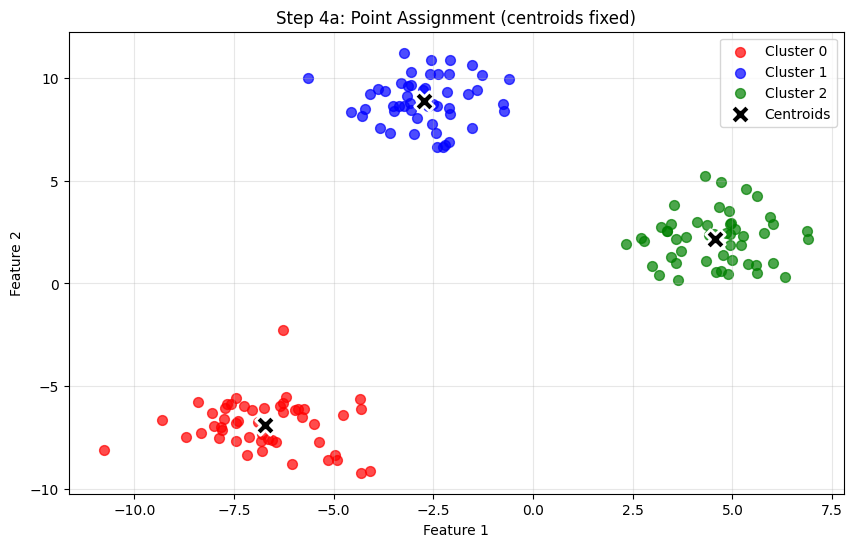

    Points per cluster: [50 50 50]
    Current WCSS (inertia): 408.38
3b. Updating centroids to cluster means...


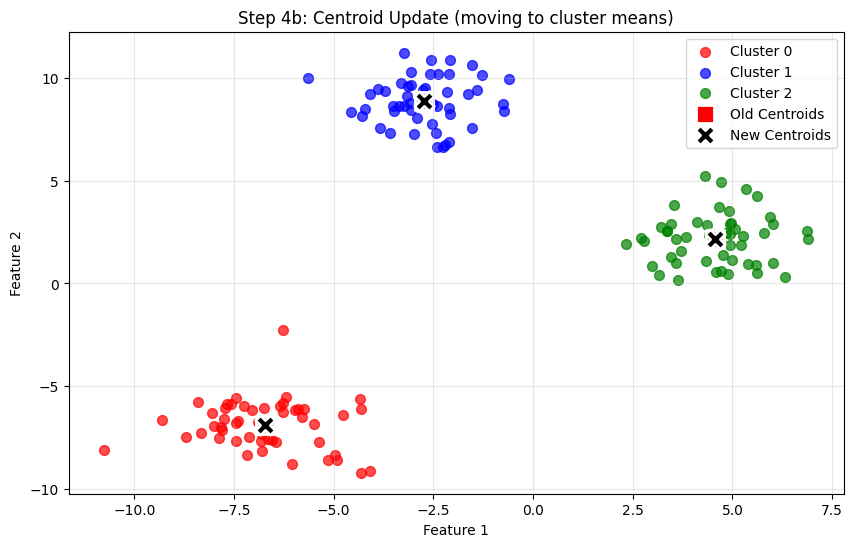

    New centroids:
      Centroid 0: (-6.73, -6.89) [moved 0.000]
      Centroid 1: (-2.74, 8.88) [moved 0.000]
      Centroid 2: (4.57, 2.18) [moved 0.000]
    Total centroid movement: 0.000
    ✓ CONVERGED! (movement < 0.01)

K-Means completed after 4 iterations!
Final WCSS (inertia): 408.38


In [12]:
# Iterative Process

# Track convergence
previous_centroids = centroids.copy()
iteration = 0
converged = False

print(f"\nStarting K-Means iterations (max {max_iterations} iterations):")
print("-" * 55)

while iteration < max_iterations and not converged:
    iteration += 1
    
    print(f"\nITERATION {iteration}:")
    print("=" * 15)
    
    # Step 3a: Assign points to nearest centroids
    print(f"3a. Assigning points to nearest centroids...")
    labels, distances = assign_clusters(X, centroids)
    
    # Show assignment step
    plot_kmeans_step(X, centroids, labels, f"{iteration}a", 
                    "Point Assignment (centroids fixed)")
    
    # Calculate and display metrics for this step
    cluster_counts = np.bincount(labels)
    print(f"    Points per cluster: {cluster_counts}")
    
    # Calculate within-cluster sum of squares (WCSS)
    wcss = 0
    for i in range(k):
        mask = labels == i
        if np.any(mask):
            cluster_points = X[mask]
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    
    print(f"    Current WCSS (inertia): {wcss:.2f}")
    
    # Step 3b: Update centroids
    print(f"3b. Updating centroids to cluster means...")
    new_centroids = update_centroids(X, labels, k)
    
    # Show centroid movement
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    # Plot points with cluster colors
    for i in range(k):
        mask = labels == i
        if np.any(mask):
            plt.scatter(X[mask, 0], X[mask, 1], 
                       c=colors[i], s=50, alpha=0.7, 
                       label=f'Cluster {i}')
    
    # Plot old centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='red', marker='s', s=150, linewidths=2,
               edgecolors='white', label='Old Centroids')
    
    # Plot new centroids
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], 
               c='black', marker='X', s=200, linewidths=2,
               edgecolors='white', label='New Centroids')
    
    # Draw arrows showing centroid movement
    for i in range(k):
        plt.annotate('', xy=new_centroids[i], xytext=centroids[i],
                    arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
    
    plt.title(f'Step {iteration}b: Centroid Update (moving to cluster means)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Display new centroid positions
    print(f"    New centroids:")
    centroid_movement = 0
    for i, (old, new) in enumerate(zip(centroids, new_centroids)):
        movement = euclidean_distance(old, new)
        centroid_movement += movement
        print(f"      Centroid {i}: ({new[0]:.2f}, {new[1]:.2f}) "
              f"[moved {movement:.3f}]")
    
    print(f"    Total centroid movement: {centroid_movement:.3f}")
    
    # Check for convergence
    convergence_threshold = 0.01
    if centroid_movement < convergence_threshold:
        converged = True
        print(f"    ✓ CONVERGED! (movement < {convergence_threshold})")
    else:
        print(f"    → Continuing... (movement >= {convergence_threshold})")
    
    # Update centroids for next iteration
    centroids = new_centroids.copy()

print(f"\nK-Means completed after {iteration} iterations!")
print(f"Final WCSS (inertia): {wcss:.2f}")

Scikit-learn results:
  Iterations: 2
  Final inertia: 408.38
  Centroids:
    Cluster 0: (-2.74, 8.88)
    Cluster 1: (-6.73, -6.89)
    Cluster 2: (4.57, 2.18)


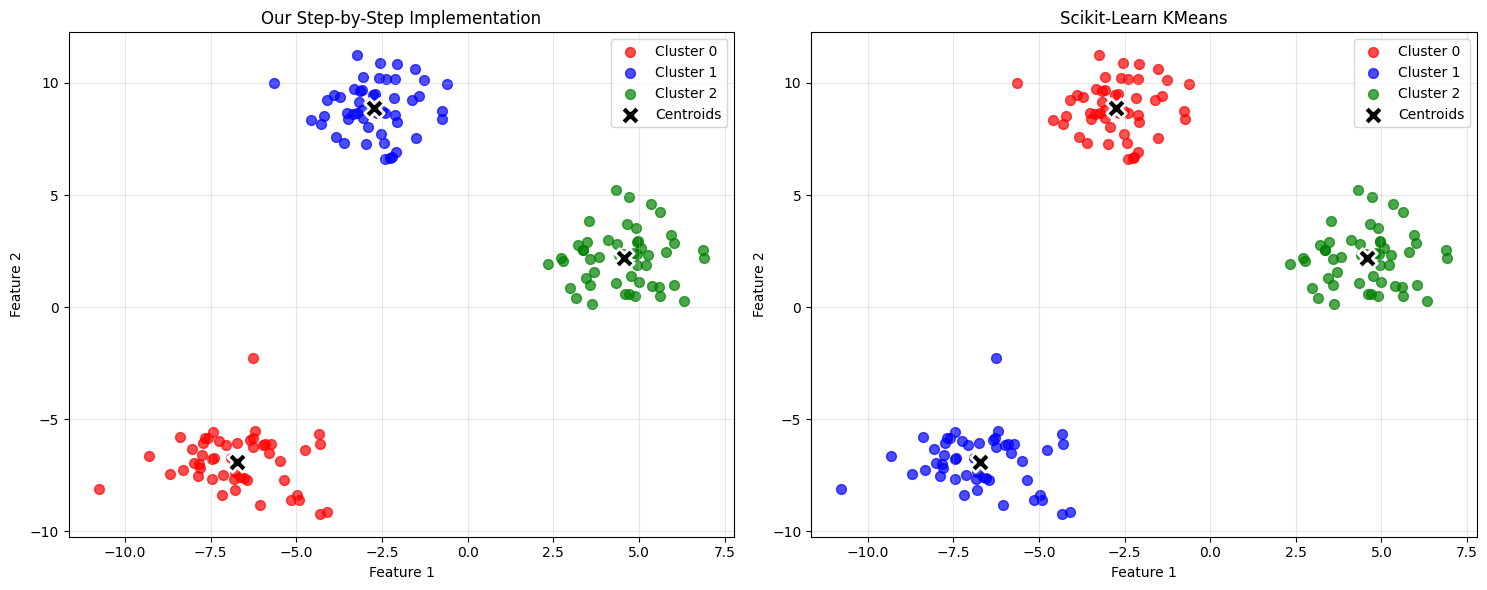

In [13]:
# Compare with Scikit-Learn

# Run scikit-learn's KMeans for comparison
sklearn_kmeans = KMeans(n_clusters=k, random_state=42, n_init=1, max_iter=max_iterations)
sklearn_labels = sklearn_kmeans.fit_predict(X)
sklearn_centroids = sklearn_kmeans.cluster_centers_

print(f"Scikit-learn results:")
print(f"  Iterations: {sklearn_kmeans.n_iter_}")
print(f"  Final inertia: {sklearn_kmeans.inertia_:.2f}")
print(f"  Centroids:")
for i, centroid in enumerate(sklearn_centroids):
    print(f"    Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

# Side-by-side comparison
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(k):
    mask = labels == i
    if np.any(mask):
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colors[i], s=50, alpha=0.7, 
                   label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', marker='X', s=200, linewidths=2,
           edgecolors='white', label='Centroids')
plt.title('Our Step-by-Step Implementation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i in range(k):
    mask = sklearn_labels == i
    if np.any(mask):
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colors[i], s=50, alpha=0.7, 
                   label=f'Cluster {i}')

plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], 
           c='black', marker='X', s=200, linewidths=2,
           edgecolors='white', label='Centroids')
plt.title('Scikit-Learn KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()